In [18]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom, bernoulli
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from scipy.stats import zscore

from IPython.display import Image, display

In [31]:
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
# import networkx as nx
# to_pdot = nx.drawing.nx_pydot.to_pydot
# pdot = to_pdot(nx.complete_graph(5))
# view_pydot(pdot)

In [11]:
df = pd.read_csv('data/chain_model.csv').values
data = zscore(df)
data

array([[ 1.66243846,  2.43275037,  2.61938388],
       [ 0.01053146,  0.35225572,  1.86116337],
       [ 0.89019622,  0.86097339,  1.24342546],
       ...,
       [ 0.60046421,  1.09022556,  0.87159572],
       [ 0.41600954,  0.46976293, -0.01273993],
       [-1.09081582, -0.89481958, -0.77229256]])

In [128]:
g, edges = fci(data, independence_test_method='fisherz', node_names=['x','y','z'])

Depth=0, working on node 2: 100%|███████████████| 3/3 [00:00<00:00, 1552.30it/s]


In [129]:
g

In [130]:
g.get_causal_ordering()

In [131]:
g.get_node_map()

{<causallearn.graph.GraphNode.GraphNode at 0x7c339c182d60>: 0,
 <causallearn.graph.GraphNode.GraphNode at 0x7c339c182280>: 1,
 <causallearn.graph.GraphNode.GraphNode at 0x7c339c182730>: 2}

In [132]:
for n in g.get_causal_ordering():
    print(n.get_name(), n.get_node_type(), n.get_node_variable_type())

x MEASURED None
y MEASURED None
z MEASURED None


In [133]:
g.pag

True

In [134]:
g.num_vars

3

In [135]:
g.graph

array([[0, 2, 0],
       [2, 0, 2],
       [0, 2, 0]])

### Endpoints interpretation

A --> B: G[A,B] = -1, G[A,B] = 1

A o-> B: G[A,B] = 2, G[A,B] = 1

A o-o B: G[A,B] = 2, G[A,B] = 2

A <-> B: G[A,B] = 1, G[A,B] = 1

In [136]:
node = g.get_causal_ordering()[0]
for n in g.get_adjacent_nodes(node=node):
    print(f'{node} -- {n}')

x -- y


In [137]:
g.get_graph_edges()

In [138]:
g.get_graph_edges()[0].properties

[]

In [139]:
g.get_node_map()

{<causallearn.graph.GraphNode.GraphNode at 0x7c339c182d60>: 0,
 <causallearn.graph.GraphNode.GraphNode at 0x7c339c182280>: 1,
 <causallearn.graph.GraphNode.GraphNode at 0x7c339c182730>: 2}

In [140]:
pdy = GraphUtils.to_pydot(g)
#pdy.write_png('simple_test.png')

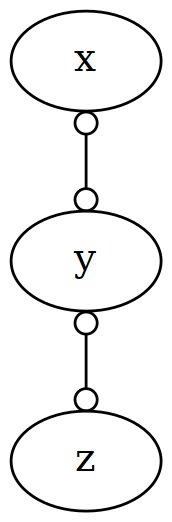

In [141]:
Image(pdy.create_png(), width=70, height=70)

In [45]:
print(edges[0].get_node1().get_name())
print(edges[0].get_node2().get_name())

X1
X2


In [46]:
edges[0].properties

[]

In [51]:
x, y, z = data[:,0], data[:,1], data[:,2]

In [53]:
print(f'(x,y) r:{pearsonr(x,y).statistic:.4f} p:{pearsonr(x,y).pvalue:.4f}')
print(f'(x,z) r:{pearsonr(x,z).statistic:.4f} p:{pearsonr(x,z).pvalue:.4f}')
print(f'(y,z) r:{pearsonr(y,z).statistic:.4f} p:{pearsonr(y,z).pvalue:.4f}')

(x,y) r:0.9319 p:0.0000
(x,z) r:0.6584 p:0.0000
(y,z) r:0.7047 p:0.0000


In [55]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
z = np.expand_dims(z, axis=1)

In [54]:
from utils import my_fisherz

In [57]:
my_fisherz(x,z)
my_fisherz(x,z, condition_on=y)

24.9464, 0.0000
0.2109, 0.8330


In [58]:
my_fisherz(x,y)
my_fisherz(x,y, condition_on=z)

52.8109, 0.0000
42.8933, 0.0000


In [59]:
my_fisherz(y,z)
my_fisherz(y,z, condition_on=x)

27.6798, 0.0000
10.9539, 0.0000
